# **Lab: Time-Series**



## Exercise 2: Facebook Prophet

We will train a Prophet model on the same dataset as previously.


**Pre-requisites:**
- Create a github account (https://github.com/join)
- Install git (https://git-scm.com/book/en/v2/Getting-Started-Installing-Git)
- Install Docker (https://docs.docker.com/get-docker/)

The steps are:
1.   Launch Docker image
2.   Load and Prepare Data
3.   Train Prophet model with default hyperparameter
4.   Train Prophet model with cross validation
5.   Train Prophet model with holidays
6.   Train Prophet model with monthly seasonality
7.   Push changes


## 1. Create new Git branch


**[1.1]** Create a new git branch called `prophet`

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git checkout -b prophet

**[1.2]** Launch Jupyter Lab from your virtual environment

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
poetry run jupyter lab

**[1.3]** Navigate the folder `notebooks` and create a new jupyter notebook called `2_prophet.ipynb`

### 2. Load Data

**[2.1]** Launch magic commands to automatically reload modules

In [ ]:
# Placeholder for student's code (Python code)

In [1]:
# Solution:
%load_ext autoreload
%autoreload 2

**[2.2]** Import the pandas and numpy package

In [2]:
# Placeholder for student's code (Python code)

In [3]:
# Solution
import pandas as pd
import numpy as np

**[2.3]** Load the different sets from `data/processed`


In [4]:
# Placeholder for student's code (Python code)

In [5]:
#Solution:
from my_krml_studentid.data.sets import load_sets

X_train, y_train, X_val, y_val, X_test, y_test = load_sets()

**[2.4]** Create a dataframe called `df_train` using `X_train` and `y_train` as columns and named them `ds` and `y`

In [6]:
# Placeholder for student's code (Python code)

In [7]:
# Solution
df_train = pd.DataFrame(X_train, columns=['ds'])
df_train['y'] = y_train

**[2.5]** Create a dataframe called `df_val` using `X_val` and `y_val` as columns and named them `ds` and `y`

In [8]:
# Placeholder for student's code (Python code)

In [9]:
# Solution
df_val = pd.DataFrame(X_val, columns=['ds'])
df_val['y'] = y_val

# 3. Train Prophet model with default hyperparameter

**[3.1]** Import numpy and add an alias for `np.float_` to `np.float64`


In [10]:
import numpy as np
np.float_ = np.float64

**[3.2]** Import the Prophet module from prophet


In [11]:
# Placeholder for student's code (Python code)

In [12]:
# Solution:
from prophet import Prophet

/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib is building the font cache; this may take a moment.
Importing plotly failed. Interactive plots will not work.


**[3.3]** Instantiate the Prophet class into a variable called prophet

In [13]:
# Placeholder for student's code (Python code)

In [14]:
# Solution
prophet = Prophet()

**[3.4]** Task: Fit the model with the prepared data

In [15]:
# Placeholder for student's code (Python code)

In [16]:
# Solution
prophet.fit(df_train)

21:14:12 - cmdstanpy - INFO - Chain [1] start processing
21:14:13 - cmdstanpy - INFO - Chain [1] done processing


**[3.5]** Import `dump` from `joblib` and save the fitted model into the folder `models` as a file called `prophet_default`

In [17]:
# Placeholder for student's code (Python code)

In [18]:
# Solution:
from joblib import dump

dump(prophet,  '../models/prophet_default.joblib')

['../models/prophet_default.joblib']

**[3.6]** Forecast the future dates from `df_val` with `predict()` and save the results in a variable called `forecast`

In [19]:
# Placeholder for student's code (Python code)

In [20]:
# Solution
forecast = prophet.predict(df_val)

**[3.7]** Plot the forecasts of this model with `plot()`

/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


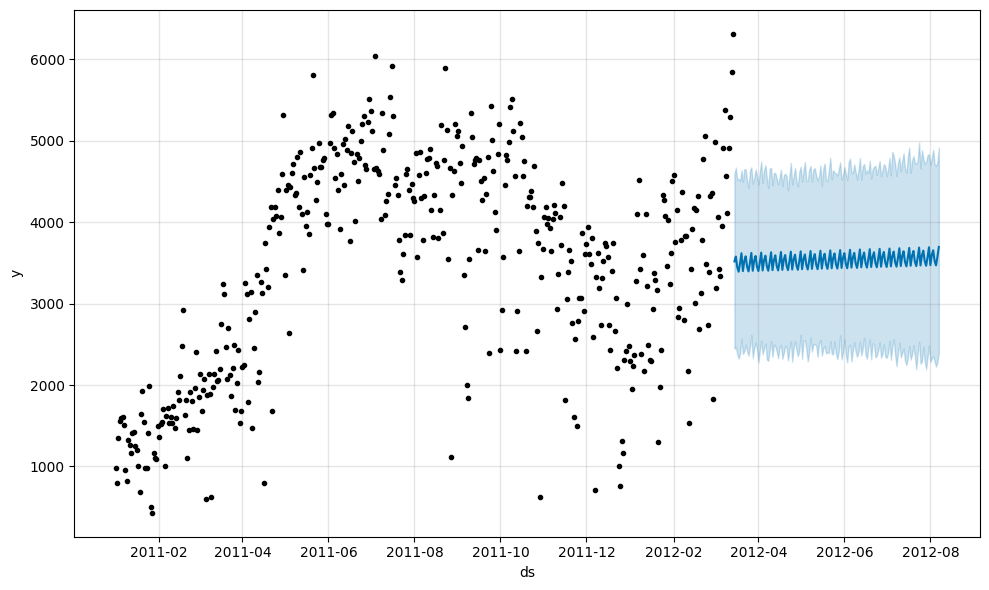

In [21]:
fig1 = prophet.plot(forecast)

**[3.8]** Plot the components of this model with `plot_components()`



/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


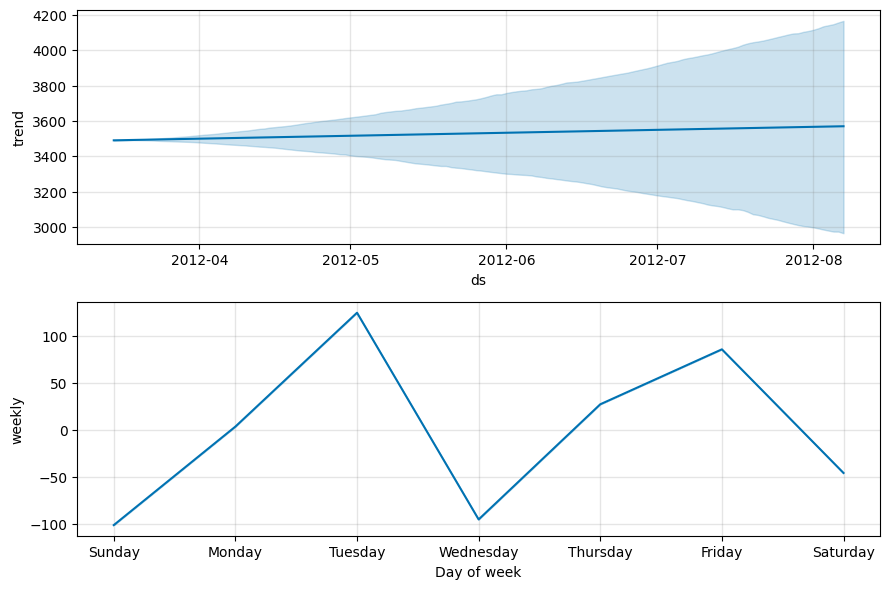

In [22]:
fig2 = prophet.plot_components(forecast)

**[3.9]** Import `print_regressor_scores` from `my_krml_149874.models.performance`

In [23]:
# Placeholder for student's code (Python code)

In [24]:
# Solution
from my_krml_studentid.models.performance import print_regressor_scores

**[3.10]** Copy the column `y` from `df_val` into `forecast`

In [25]:
# Placeholder for student's code (Python code)

In [26]:
# Solution
print_regressor_scores(forecast['yhat'], df_val['y'], set_name='Validation')

RMSE Validation: 3016.3016044420247
MAE Validation: 2855.822784536118


/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 4. Train Prophet model with cross validation

**[4.1]** Load the `data/interim/day_prophet.csv` file into a dataframe called `prophet_df`

In [27]:
# Placeholder for student's code (Python code)

In [28]:
# Solution
prophet_df = pd.read_csv('../data/interim/day_prophet.csv')

**[4.2]** Import cross_validation from fbprophet.diagnostics

In [29]:
# Placeholder for student's code (Python code)

In [30]:
# Solution
from prophet.diagnostics import cross_validation

**[4.3]** Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')


In [31]:
cv_results = cross_validation(prophet, initial='365 days', period='7 days', horizon='7 days')

  0%|                                                    | 0/10 [00:00<?, ?it/s]21:16:32 - cmdstanpy - INFO - Chain [1] start processing
21:16:32 - cmdstanpy - INFO - Chain [1] done processing
21:16:32 - cmdstanpy - INFO - Chain [1] start processing
21:16:32 - cmdstanpy - INFO - Chain [1] done processing
21:16:32 - cmdstanpy - INFO - Chain [1] start processing
21:16:32 - cmdstanpy - INFO - Chain [1] done processing
 30%|█████████████▏                              | 3/10 [00:00<00:00, 21.32it/s]21:16:32 - cmdstanpy - INFO - Chain [1] start processing
21:16:32 - cmdstanpy - INFO - Chain [1] done processing
21:16:32 - cmdstanpy - INFO - Chain [1] start processing
21:16:32 - cmdstanpy - INFO - Chain [1] done processing
21:16:32 - cmdstanpy - INFO - Chain [1] start processing
21:16:32 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████████████████████████▍                 | 6/10 [00:00<00:00, 23.70it/s]21:16:32 - cmdstanpy - INFO - Chain [1] start processing
21:16:32 - cmdstanpy - IN

**[4.4]** Calculate performance metrics on the cross validation

In [32]:
from prophet.diagnostics import performance_metrics
metrics_results = performance_metrics(cv_results)
metrics_results

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,2.079161e+06,1441.929624,1261.764266,0.287983,0.299426,0.347427,0.4
1,2 days,8.408332e+05,916.969586,805.406578,0.204773,0.208389,0.234072,0.6
2,3 days,1.241272e+06,1114.123942,945.478919,0.321880,0.299783,0.310370,0.4
3,4 days,7.787795e+05,882.484830,714.871776,0.261406,0.183496,0.247671,0.8
4,5 days,1.014885e+06,1007.414956,805.678468,0.214552,0.183004,0.240257,0.7
5,6 days,2.063650e+06,1436.541149,1280.990171,0.290569,0.287378,0.349055,0.4
6,7 days,3.182050e+06,1783.830092,1523.532058,0.360133,0.426003,0.429220,0.4


**[4.5]** Import plot_cross_validation_metric from fbprophet.plot

In [33]:
# Placeholder for student's code (Python code)

In [34]:
# Solution
from prophet.plot import plot_cross_validation_metric

**[4.6]** Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results

/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


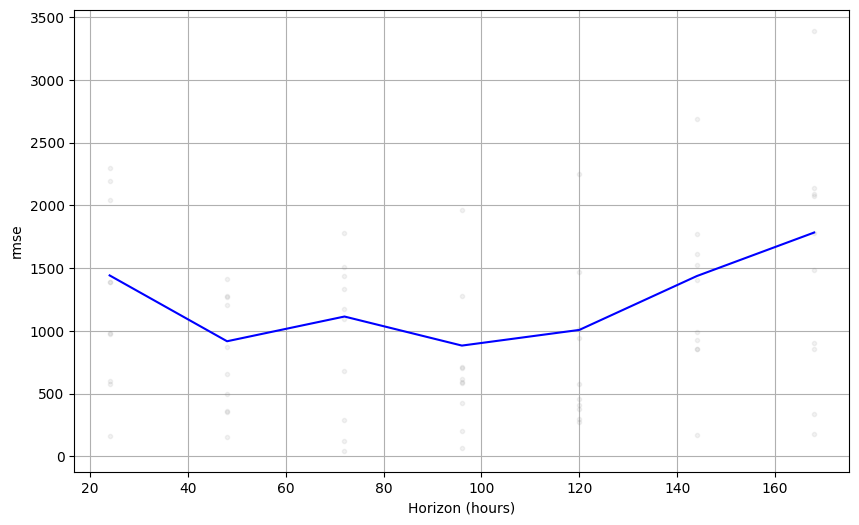

In [35]:
fig3 = plot_cross_validation_metric(cv_results, metric='rmse')

### 5. Train Prophet model with holidays

**[5.1]** Instantiate the Prophet class into a variable called prophet1

In [36]:
# Placeholder for student's code (Python code)

In [37]:
# Solution
prophet1 = Prophet()

**[5.2]** Add the US holidays component to the model

In [38]:
prophet1.add_country_holidays(country_name='US')

**[5.3]** Fit the model with the prepared data

In [39]:
# Placeholder for student's code (Python code)

In [40]:
# Solution
prophet1.fit(prophet_df)

21:17:19 - cmdstanpy - INFO - Chain [1] start processing
21:17:19 - cmdstanpy - INFO - Chain [1] done processing


**[5.4]** Save the fitted model into the folder `models` as a file called `prophet_holiday.joblib`

In [41]:
# Placeholder for student's code (Python code)

In [42]:
dump(prophet1,  '../models/prophet_holiday.joblib')

['../models/prophet_holiday.joblib']

**[5.5]** Forecast the future dates with predict() and save the results in a variable called forecast1

In [43]:
# Placeholder for student's code (Python code)

In [44]:
# Solution:
forecast1 = prophet1.predict(df_train)

**[5.6]** Print the components of this model on the predictions

In [45]:
# Placeholder for student's code (Python code)

/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:354: Future

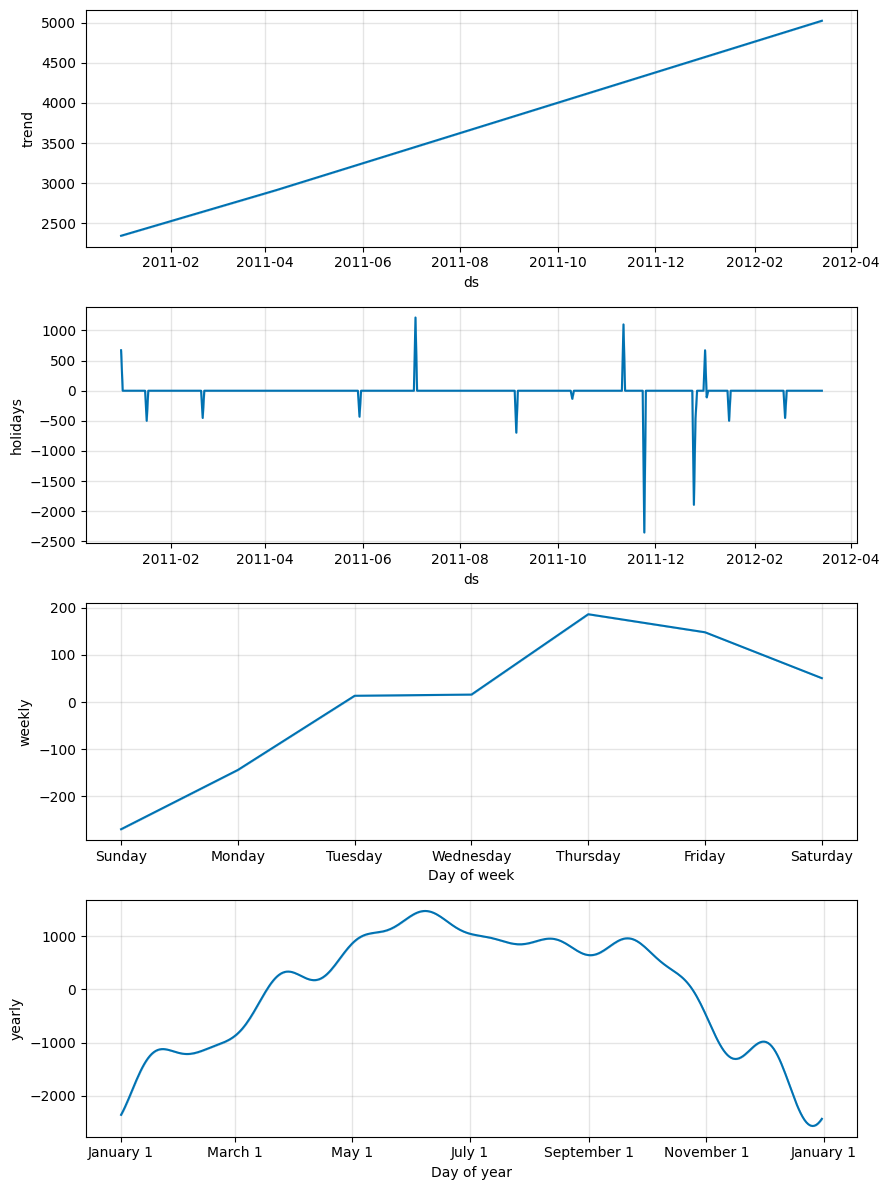

In [46]:
# Solution:
fig1 = prophet1.plot_components(forecast1)

**[5.7]** Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [47]:
# Placeholder for student's code (Python code)

In [48]:
# Solution:
cv_results1 = cross_validation(prophet1, initial='365 days', period='7 days', horizon='7 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                    | 0/52 [00:00<?, ?it/s]21:17:41 - cmdstanpy - INFO - Chain [1] start processing
21:17:41 - cmdstanpy - INFO - Chain [1] done processing
21:17:41 - cmdstanpy - INFO - Chain [1] start processing
21:17:41 - cmdstanpy - INFO - Chain [1] done processing
  4%|█▋                                          | 2/52 [00:00<00:03, 14.93it/s]21:17:41 - cmdstanpy - INFO - Chain [1] start processing
21:17:41 - cmdstanpy - INFO - Chain [1] done processing
21:17:41 - cmdstanpy - INFO - Chain [1] start processing
21:17:41 - cmdstanpy - INFO - Chain [1] done processing
  8%|███▍                                        | 4/52 [00:00<00:03, 15.31it/s]21:17:41 - cmdstanpy - INFO - Chain [1] start processing
21:17:41 - cmdstanpy - INFO - Chain [1] done processing
21:17:41 - cmdstanpy - INFO - Chain [1] start processing
21:17:41 - cmdstanpy - INFO - Chai

**[5.8]** Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results

In [49]:
# Placeholder for student's code (Python code)

/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


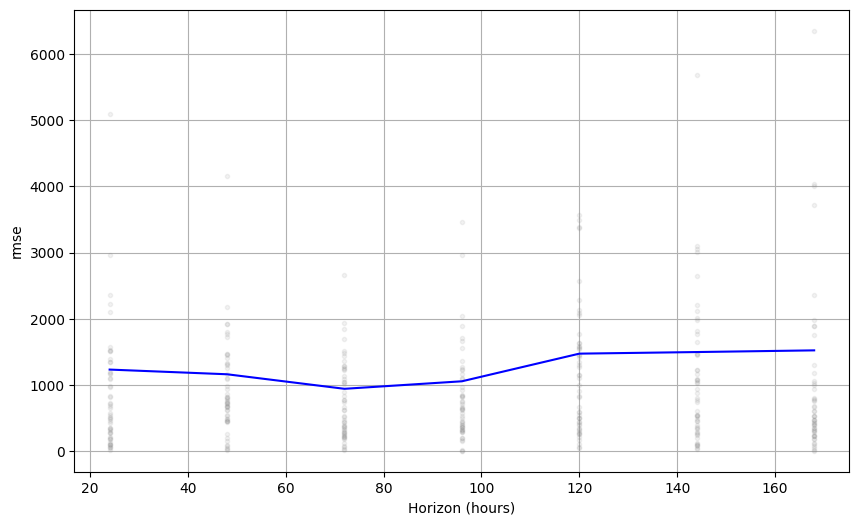

In [50]:
# Solution:
fig2 = plot_cross_validation_metric(cv_results1, metric='rmse')

### 6. Train Prophet model with monthly seasonality

**[6.1]** Instantiate the Prophet class into a variable called prophet2 and add the US holidays component to the model

In [51]:
# Placeholder for student's code (Python code)

In [52]:
# Solution
prophet2 = Prophet()
prophet2.add_country_holidays(country_name='US')

**[6.2]** Add a monthly seasonal component to the model with period=30.5 and fourier_order=5

In [53]:
prophet2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

**[6.3]** Fit the model with the prepared data

In [54]:
# Placeholder for student's code (Python code)

In [55]:
# Solution
prophet2.fit(prophet_df)

21:18:06 - cmdstanpy - INFO - Chain [1] start processing
21:18:06 - cmdstanpy - INFO - Chain [1] done processing


**[6.4]** Save the fitted model into the folder `models` as a file called `prophet_month.joblib`

In [56]:
# Placeholder for student's code (Python code)

In [57]:
dump(prophet2,  '../models/prophet_month.joblib')

['../models/prophet_month.joblib']

**[6.5]** Forecast the future dates with predict() and save the results in a variable called forecast2

In [58]:
# Placeholder for student's code (Python code)

In [59]:
# Solution:
forecast2 = prophet2.predict(df_train)

**[6.6]** Print the components of this model on the predictions

In [60]:
# Placeholder for student's code (Python code)

/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:354: Future

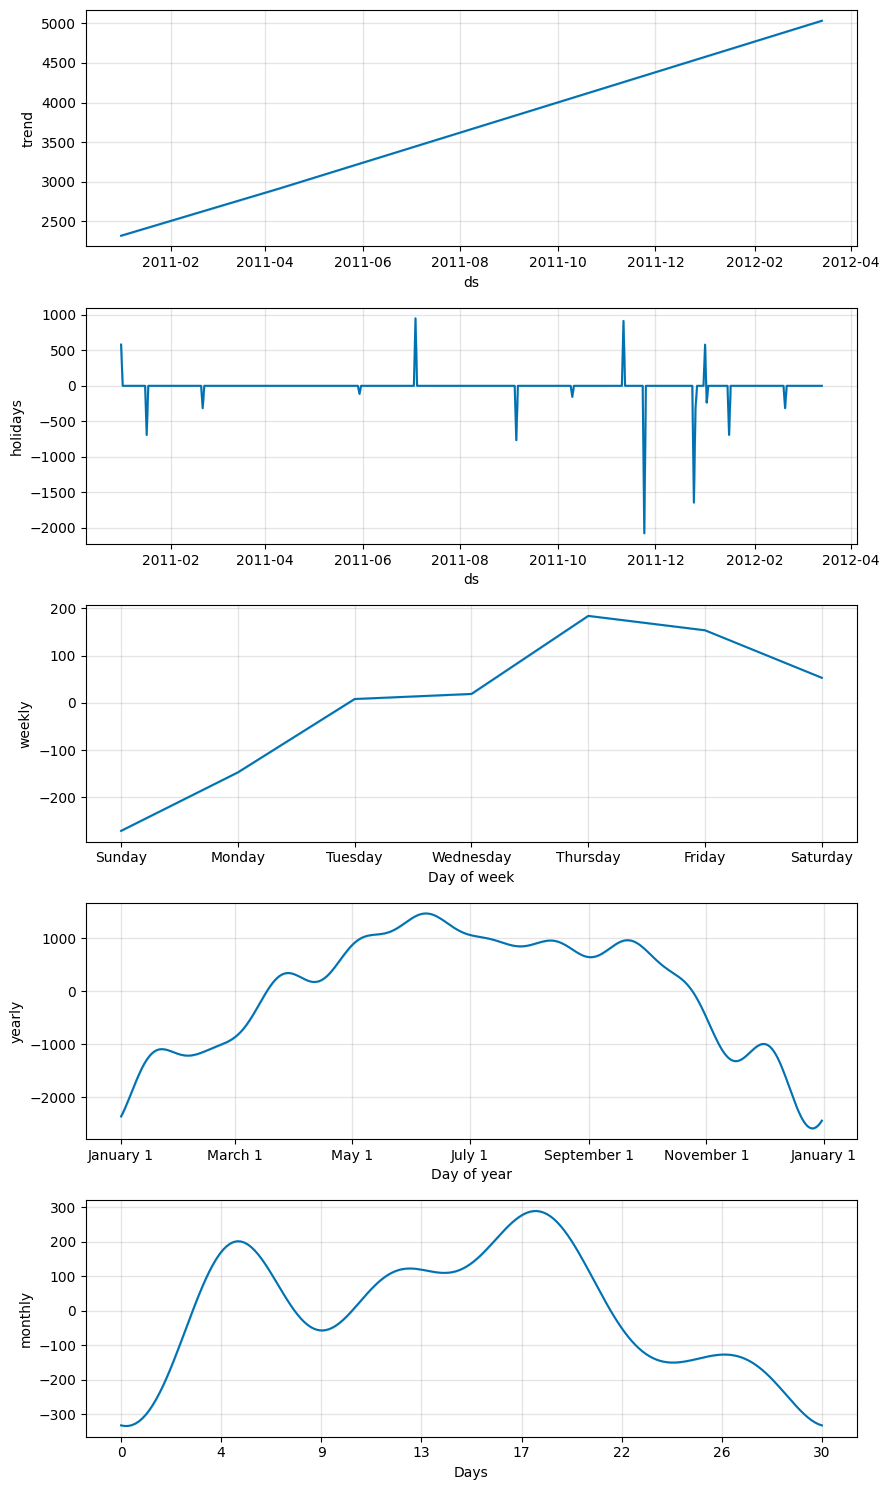

In [61]:
# Solution:
fig1 = prophet2.plot_components(forecast2)

**[6.7]** Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [62]:
# Placeholder for student's code (Python code)

In [63]:
# Solution:
cv_results2 = cross_validation(prophet2, initial='365 days', period='7 days', horizon='7 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                    | 0/52 [00:00<?, ?it/s]21:18:50 - cmdstanpy - INFO - Chain [1] start processing
21:18:51 - cmdstanpy - INFO - Chain [1] done processing
21:18:51 - cmdstanpy - INFO - Chain [1] start processing
21:18:51 - cmdstanpy - INFO - Chain [1] done processing
  4%|█▋                                          | 2/52 [00:00<00:03, 13.13it/s]21:18:51 - cmdstanpy - INFO - Chain [1] start processing
21:18:51 - cmdstanpy - INFO - Chain [1] done processing
21:18:51 - cmdstanpy - INFO - Chain [1] start processing
21:18:51 - cmdstanpy - INFO - Chain [1] done processing
  8%|███▍                                        | 4/52 [00:00<00:03, 13.61it/s]21:18:51 - cmdstanpy - INFO - Chain [1] start processing
21:18:51 - cmdstanpy - INFO - Chain [1] done processing
21:18:51 - cmdstanpy - INFO - Chain [1] start processing
21:18:51 - cmdstanpy - INFO - Chai

**[6.8]** Plot the RMSE score with `plot_cross_validation_metric()` on the cross validation results

In [64]:
# Placeholder for student's code (Python code)

/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/reasmeytith/Library/Caches/pypoetry/virtualenvs/adv-mla-lab-2-BUYJjqLi-py3.12/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


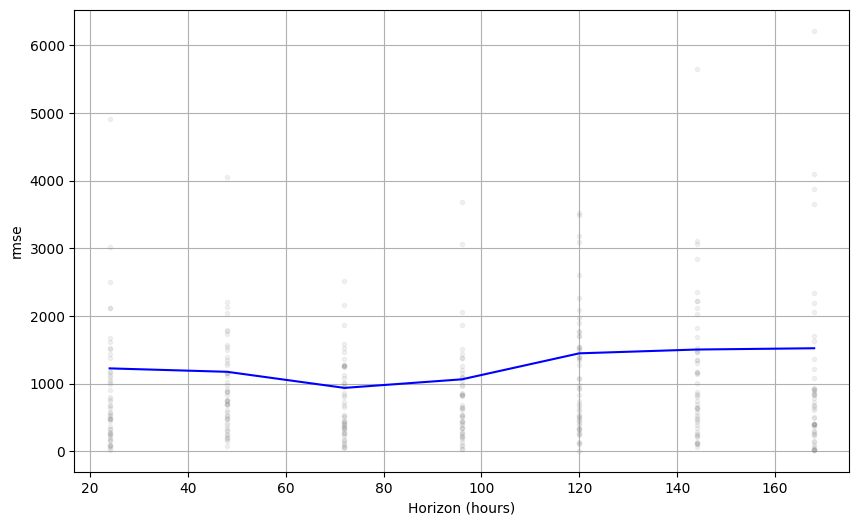

In [65]:
# Solution:
fig2 = plot_cross_validation_metric(cv_results2, metric='rmse')

### 7.   Push changes

**[7.1]** Add you changes to git staging area

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git add .

**[7.2]** Create the snapshot of your repository and add a description

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git commit -m "prophet"

**[7.3]** Push your snapshot to Github

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git push

**[7.4]** Go to Github and merge the branch after reviewing the code and fixing any conflict




**[7.5]** Check out to the master branch

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
# Solution:
git checkout master

**[7.6]** Pull the latest updates

In [ ]:
# Placeholder for student's code (command line)

In [ ]:
git pull

**[7.7]** Stop Jupyter Lab